In [3]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
from scipy.stats import kstest
from scipy.stats import levene
from itertools import combinations
import researchpy as rp
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import math
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("data/sephora2.csv", index_col = 0)
df.head(1)

,brand,category,size,rating,number_of_reviews,love,price,online_only,exclusive,limited_edition
0,Acqua Di Parma,Fragrance,5 x 0.16oz/5mL,4.0,4,3002,66.0,Yes,No,No


# Regresión Lineal V. Normalización

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

1. Sobre la variable respuesta, en pair programmings anteriores identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste.


In [5]:
# Analíticamente se puede ver que el p-value es 0,0, por lo que nuestra variable respuesta no es normal.

kstest(df["price"], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

##### Intentamos normalizar la variable respuesta manualmente:

In [6]:
media = df["price"].mean()
maximo = df["price"].max() 
minimo = df["price"].min()

df["price_manual"] = (df["price"] - media) / (maximo - minimo )

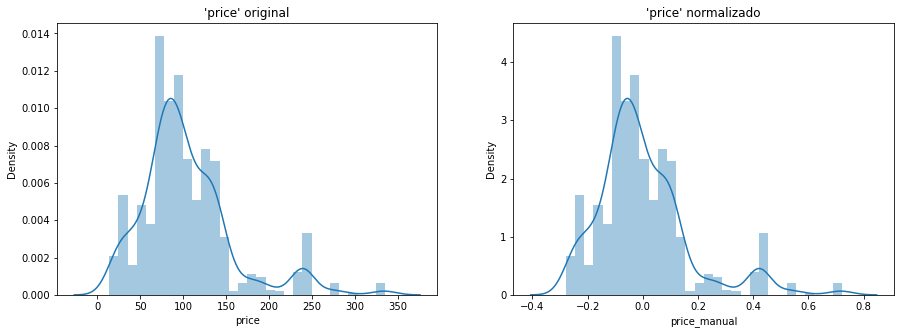

In [7]:
# Lo comprobamos visualmente.

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title("'price' original")
axes[1].set_title("'price' normalizado")

sns.distplot(df["price"] ,ax = axes[0])
sns.distplot(df["price_manual"], ax = axes[1]);

In [8]:
# Lo comprobamos analíticamente.

kstest(df["price_manual"], "norm")

KstestResult(statistic=0.3927583348034441, pvalue=2.8844742603830764e-138)

Como podemos apreciar, no ha realizado cambios significativos, por lo que continuamos realizando otros métodos.

#### Aplicamos el método logarítmico:

In [9]:
df["price_log"] = df["price"].apply(lambda x: np.log(x) if x > 0 else 0)

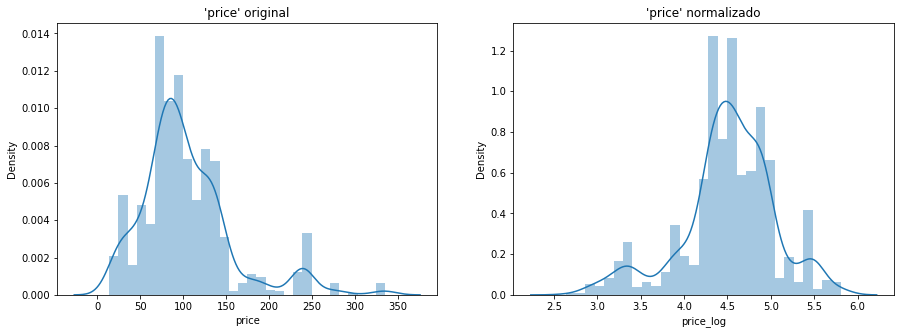

In [10]:
# Lo comprobamos visualmente.

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title("'price' original")
axes[1].set_title("'price' normalizado")

sns.distplot(df["price"] ,ax = axes[0])
sns.distplot(df["price_log"], ax = axes[1]);

In [11]:
# Lo comprobamos analíticamente.

kstest(df["price_log"], "norm")

KstestResult(statistic=0.9966867873309893, pvalue=0.0)


Visualmente sí parecía que se han realizado cambios, pero analíticamente observamos que no ha sido así. Continuamos con el siguiente método.

#### Realizamos la raíz cuadrada:

In [12]:
df["price_raiz"] = df["price"].apply(lambda x: math.sqrt(x))

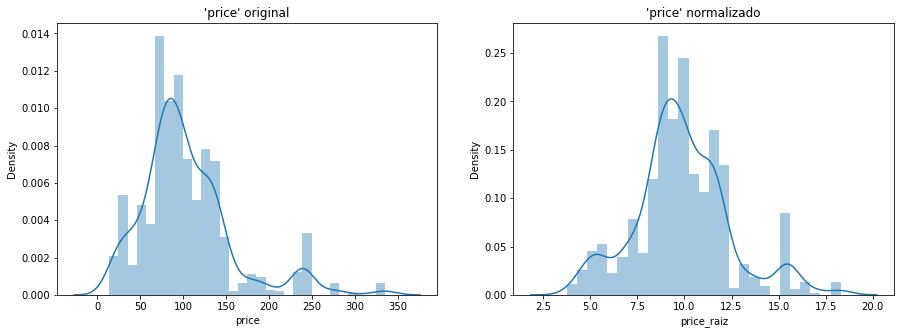

In [13]:
# Lo comprobamos visualmente.

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title("'price' original")
axes[1].set_title("'price' normalizado")

sns.distplot(df["price"] ,ax = axes[0])
sns.distplot(df["price_raiz"], ax = axes[1]);

In [14]:
# Lo comprobamos analíticamente.

kstest(df["price_raiz"], "norm")

KstestResult(statistic=0.9999085946835091, pvalue=0.0)

De nuevo, no se ha modificado, por lo que continuamos con el siguiente método.

#### Realizamos un Box-Cox:

In [15]:
df["price_box"], lambda_ajustada = stats.boxcox(df["price"])

In [16]:
# Grado de transformación que se necesita para que los datos se ajusten a una distribución normal. 

lambda_ajustada

0.298193092222438

Nuestros datos están cercanos a 0, por lo que necesitan una transformación significativa para ser normalizados.

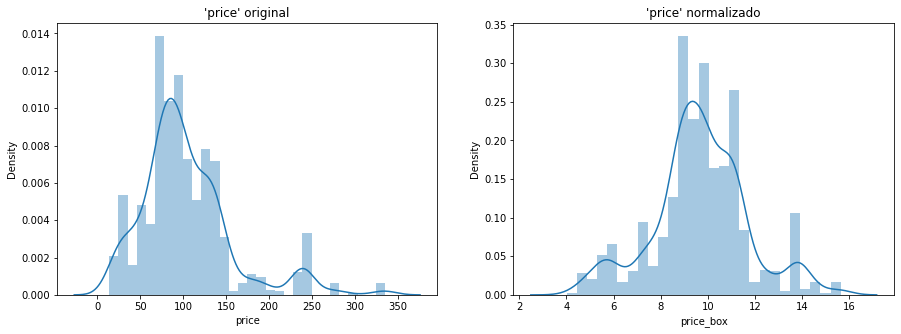

In [17]:
# Lo comprobamos visualmente.

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title("'price' original")
axes[1].set_title("'price' normalizado")

sns.distplot(df["price"] ,ax = axes[0])
sns.distplot(df["price_box"], ax = axes[1]);

In [18]:
# Lo comprobamos analíticamente.

kstest(df["price_box"], "norm")

KstestResult(statistic=0.9999700387357504, pvalue=0.0)

Otra vez, nuestros datos no se han normalizado. Probamos con el último método disponible. 

#### Realizamos un MinMaxScaler:

In [19]:
# Instanciamos el método.

minmax = MinMaxScaler()

In [20]:
# Lo ajustamos al modelo usando nuestros datos y los transformamos.

df["price_minmax"] = pd.DataFrame(minmax.fit_transform(df[["price"]]))

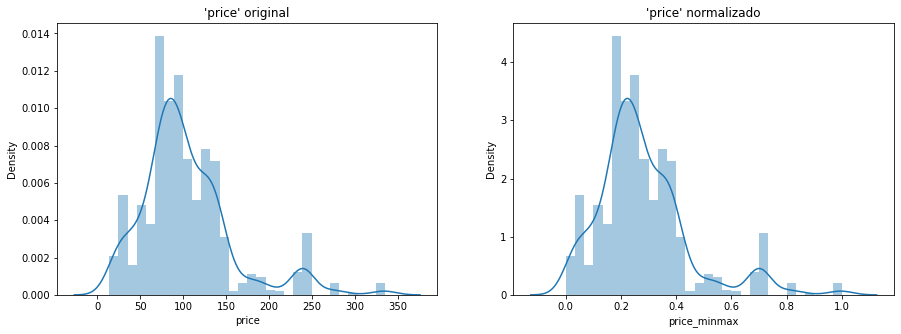

In [21]:
# Lo comprobamos visualmente.

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title("'price' original")
axes[1].set_title("'price' normalizado")

sns.distplot(df["price"] ,ax = axes[0])
sns.distplot(df["price_minmax"], ax = axes[1]);

In [22]:
# Lo comprobamos analíticamente.

kstest(df["price_minmax"], "norm")

KstestResult(statistic=0.5029529512471255, pvalue=1.5767358939329113e-232)

Ninguno de los métodos para normalizar nuestros datos nos ha servido, por lo tanto, decidimos quedarnos solamente con "price_box" porque es la variable que funcionaba mejor.

In [23]:
df.drop(["price_manual", "price_log", "price_raiz", "price_minmax"], axis = 1, inplace = True)

Por último, nuestros datos tampoco se han modificado. Por tanto, concluímos que nuestros datos no son normalizables. 

2. Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings.

In [25]:
df.to_csv("data/sephora_norm.csv")

# Regresión Lineal VI. Estandarización

In [26]:
df = pd.read_csv("data/sephora_norm.csv", index_col = 0).reset_index(drop = True)
df.head(1)

,brand,category,size,rating,number_of_reviews,love,price,online_only,exclusive,limited_edition,price_box
0,Acqua Di Parma,Fragrance,5 x 0.16oz/5mL,4.0,4,3002,66.0,Yes,No,No,8.343559


Los objetivos del pair programming de hoy son:

1. Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.


In [27]:
# Creamos un DataFrame con las variables numéricas.

numericas = df.select_dtypes(include = np.number)
numericas.head(1)

,rating,number_of_reviews,love,price,price_box
0,4.0,4,3002,66.0,8.343559


In [28]:
# Hacemos drop de "rating" porque es una falsa numérica y de "price" porque es nuestra variable respuesta.

numericas.drop(["rating", "price", "price_box"], axis = 1, inplace = True)

Decidimos emplear el método `RobustScaler` porque no hemos hecho tratamiento de outliers, ya que con los datos que tenemos no consideramos en su momento que fuera adecuado. 

In [29]:
robust = RobustScaler() # iniciamos el método.

numericas2 = pd.DataFrame(robust.fit_transform(numericas), columns = numericas.columns) # ajustamos y transformamos los datos.

In [30]:
# Convertimos el array que devuelve el método en DataFrame.

df_robust =  df.copy()

df_robust[numericas2.columns] = numericas2

df_robust.head(1)

,brand,category,size,rating,number_of_reviews,love,price,online_only,exclusive,limited_edition,price_box
0,Acqua Di Parma,Fragrance,5 x 0.16oz/5mL,4.0,-0.215962,0.156305,66.0,Yes,No,No,8.343559


In [31]:
# Comprobamos si se han generado nulos.

df_robust.isnull().sum()

brand                0
category             0
size                 0
rating               0
number_of_reviews    0
love                 0
price                0
online_only          0
exclusive            0
limited_edition      0
price_box            0
dtype: int64

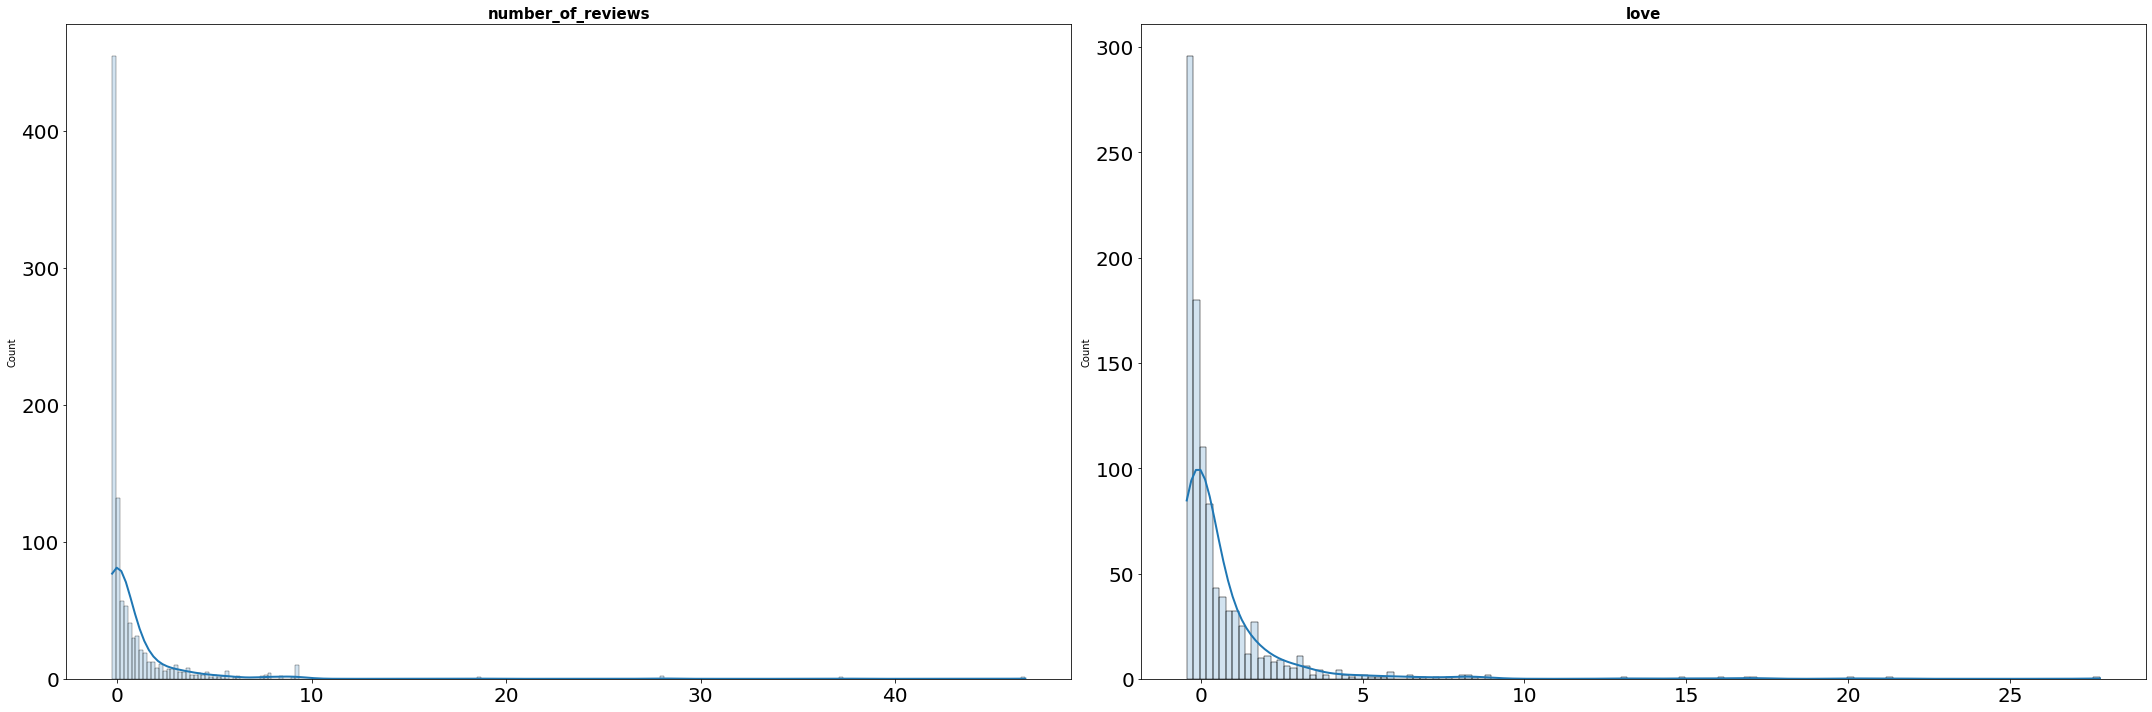

In [32]:
# Lo comprobamos visualmente.

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))

axes = axes.flat

for i, columna in enumerate(numericas2): 
    sns.histplot(
        data = numericas2,
        x = columna,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(columna, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

2. Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [34]:
df_robust.to_csv("data/sephora_estandar.csv")